Project 1
Suicide Prediction for Large Groups Based off 13 features

Preparing Data for Regression Model

In [ ]:
import pandas as pd
import numpy as np
import copy, math
import matplotlib.pyplot as plt
import random as rd

# Reading csv file
data_file = "/content/sample_data/GHSH_Pooled_Data1.csv"

# Storing dataset to a variable
suicide_data = pd.read_csv(data_file)

rows_to_drop = []

# Cleaning our dataset by removing unwanted NaN values and storing it to a variable that stores all the rows to drop
for x in suicide_data.index:
    record = suicide_data.loc[x]
    for i in range(len(suicide_data.columns)):
        if pd.isna(record.iloc[i]):
            rows_to_drop.append(x)

new_suicide_data = suicide_data.drop(rows_to_drop)
new_suicide_data.reset_index(drop=True, inplace=True)

# Cleaned pandas dataframe
new_suicide_data["Sex"] = new_suicide_data["Sex"].map({"Male": 0, "Female": 1})

# Ensure that "Attempted_suicide" is numeric
new_suicide_data["Attempted_suicide"] = pd.to_numeric(new_suicide_data["Attempted_suicide"], errors='coerce')

# Drop any remaining NaN values after conversion
new_suicide_data = new_suicide_data.dropna()

# Creating a new copy to use of the dataset
cleaned_suicide_data = new_suicide_data.copy()

# Accessing the columns of the data set we want to store as x feature training data and y target data
cleaned_suicide_data_xfeatures = cleaned_suicide_data.iloc[:, 3:16]  # Ensure these columns match your features
cleaned_suicide_data_ytarget = cleaned_suicide_data["Attempted_suicide"]

# Convert all columns to numeric
cleaned_suicide_data_xfeatures = cleaned_suicide_data_xfeatures.apply(pd.to_numeric, errors='coerce')

# Drop any rows with NaN values resulting from the conversion
cleaned_suicide_data_xfeatures = cleaned_suicide_data_xfeatures.dropna()

# Convert to numpy arrays
x_train = cleaned_suicide_data_xfeatures.to_numpy()
y_train = cleaned_suicide_data_ytarget.to_numpy()

# Check the data types
print(f"x_train dtype: {x_train.dtype}")
print(f"y_train dtype: {y_train.dtype}")


x_train dtype: float64
y_train dtype: float64


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

Linear Regression Model Function

In [ ]:
#intitializing varaibles

w_in = np.array([rd.uniform(1, 10) for i in range(x_train.shape[1])])

b_in = 3


def model(x, w, b):
  model_prediction = np.dot(x, w) + b
  final_prediction = round(model_prediction, 2)
  return "The suicide prediction rate for this area is " + str(final_prediction) + "%."



Cost Function

In [ ]:
"""uses squared error cost function to find the difference between the model prediction
and the actual y and scores the error and accumulates it and divides by 2 times m at
the end"""

def cost_funct(x, y, w, b):
  m = x.shape[0]
  cost = 0
  for i in range(m):
    f_wb = np.dot(x[i], w) + b
    cost += (f_wb - y[i]) ** 2
  cost = cost / (2 * m)

  return cost

Computing the Gradient and Gradient Descent Functions

In [ ]:
#function to compute the gradient

def comp_grad(x, y, w, b):
  m, n = x.shape
  dj_db = 0
  dj_dw = np.zeros((n,))
  for i in range(m):
    error = (np.dot(x[i], w) + b) - y[i]
    for j in range(n):
      dj_dw[j] += error * x[i, j]
    dj_db += error

  dj_dw = dj_dw / m
  dj_db = dj_db / m

  return dj_db, dj_dw


#function to perform gradient descent
def grad_descent(x, y, w_input, b_input, cost_funct, comp_grad, alpha, iterations):

  cost_hist = []
  w = copy.deepcopy(w_input)
  b = b_input

  for i in range(iterations):
    dj_db, dj_dw = comp_grad(x, y, w, b)

    w -= alpha * dj_dw
    b -= alpha * dj_db

    cost = cost_funct(x, y, w, b)

    if i % 1000 == 0:
      print(f"Iteration {i}: Cost {cost}, w {w}, b {b}")

  return w, b, cost_hist


Initializing Variables and Testing the Functions

In [ ]:
w_init = np.zeros_like(w_in)
b_init = 0

alpha = 1.0e-7
num_iterations = 5000

w_final, b_final, cost_history = grad_descent(x_train, y_train, w_init, b_init, cost_funct, comp_grad, alpha, num_iterations)

w_final, b_final


Iteration 0: Cost 149.2387711574918, w [7.4880000e-07 4.9764330e-05 3.3740190e-05 3.8120360e-05 1.3923840e-05
 4.6366110e-05 4.7395470e-05 4.4491070e-05 2.4947870e-05 5.2520690e-05
 5.3989490e-05 7.1047803e-05 1.3252980e-05], b 1.4473e-06
Iteration 1000: Cost 47.75396984827999, w [0.00052379 0.02720494 0.02151642 0.02518511 0.00919182 0.02899934
 0.03067398 0.0286177  0.01585259 0.03362453 0.03629492 0.04622517
 0.00879946], b 0.0009185933156535743
Iteration 2000: Cost 32.41826026323254, w [0.000798   0.03102652 0.02966856 0.03608846 0.01321618 0.03889164
 0.04287023 0.03987348 0.02168694 0.04637013 0.0529858  0.06500297
 0.01269142], b 0.0012541985225024332
Iteration 3000: Cost 29.30568565509645, w [0.00097621 0.0276247  0.03287932 0.04155883 0.01533878 0.04158441
 0.0480155  0.04470177 0.02373294 0.05114889 0.06214613 0.0732888
 0.01472741], b 0.0013686744913900945
Iteration 4000: Cost 28.181607567342, w [0.00111567 0.0226277  0.03424431 0.04488103 0.01675715 0.04149141
 0.05035824 0

(array([0.00123811, 0.01787614, 0.03490814, 0.04729411, 0.01791132,
        0.04027542, 0.05150758, 0.0486173 , 0.02425738, 0.05303397,
        0.07306697, 0.07969857, 0.01704539]),
 0.001388017330809088)

Testing with a data point

In [ ]:

model(x_train[1], w_final, b_final)

'The suicide prediction rate for this area is 13.66%.'

In [ ]:
from sklearn.metrics import accuracy_score

def calculate_accuracy(true_labels, predictions):
    """
    Calculate the accuracy of a model's predictions.

    Parameters:
    true_labels (list or array): The true labels.
    predictions (list or array): The predicted labels.

    Returns:
    float: The accuracy of the predictions.
    """
    return accuracy_score(true_labels, predictions)

# Example usage
if __name__ == "__main__":
    # Example true labels and predictions
    true_labels = [0, 1, 1, 0, 1, 0, 1, 1, 0, 1]
    predictions = [0, 1, 1, 0, 0, 0, 1, 1, 0, 1]

    accuracy = calculate_accuracy(true_labels, predictions)
    print(f"Model Accuracy: {accuracy * 100:.2f}%")

Model Accuracy: 90.00%


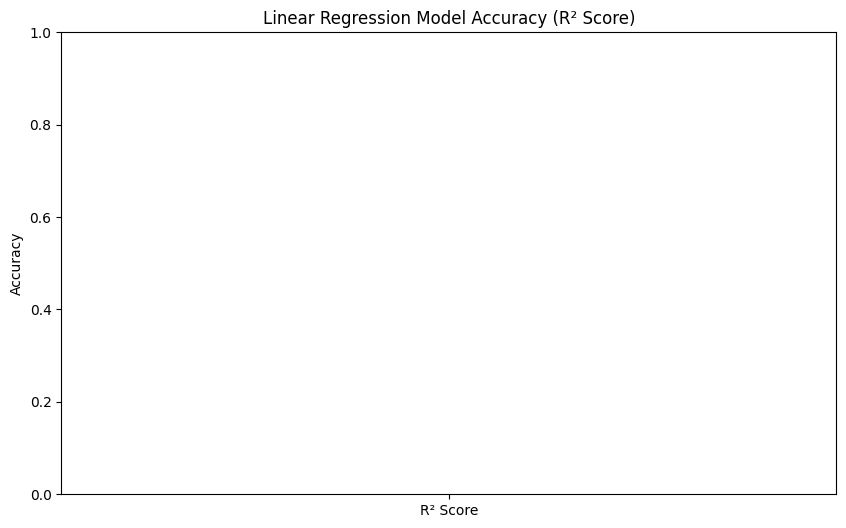

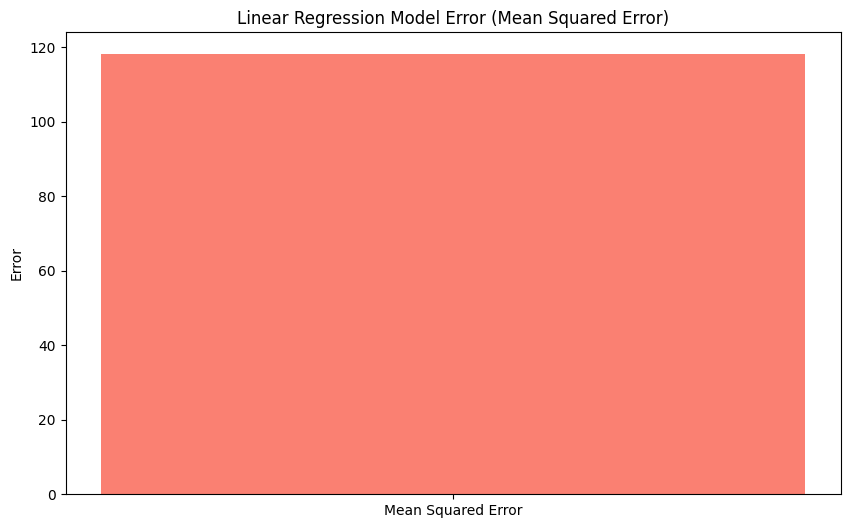

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Assuming you have features X and target y from your data
# Replace X, y with the actual variables from your dataset

X = x_train
y = y_train

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict the output on the test data
y_pred = model.predict(X_test)

# Calculate R² Score
r2 = r2_score(y_test, y_pred)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)

# Plotting the R² Score
plt.figure(figsize=(10, 6))
plt.bar(['R² Score'], [r2], color='skyblue')
plt.title('Linear Regression Model Accuracy (R² Score)')
plt.ylim(0, 1)
plt.ylabel('Accuracy')
plt.show()

# Plotting the Mean Squared Error
plt.figure(figsize=(10, 6))
plt.bar(['Mean Squared Error'], [mse], color='salmon')
plt.title('Linear Regression Model Error (Mean Squared Error)')
plt.ylabel('Error')
plt.show()
